In [ ]:
#*******************Kidney Prediction**************

In [83]:
import numpy as np
import pandas as pd


df = pd.read_csv(r"C:\Users\sugan\Downloads\Mutiple disease pred-prj4\kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [84]:
# Separate numeric and categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = [col for col in df.columns if col not in num_cols + ['classification']]

print("Numeric Columns:", len(num_cols))
print("Categorical Columns:", len(cat_cols))

Numeric Columns: 12
Categorical Columns: 13


In [85]:
#Replace placeholders with NaN
df = df.replace(['?', 'None', 'none', 'null', 'n/a', 'na', 'NaN', 'nan'], np.nan)


In [86]:
# Clean string columns (lowercase, strip)

def clean_strings(x):
    if isinstance(x, str):
        x = x.strip().lower()
        if x in ['?', 'none', 'nan', 'null', 'n/a', 'na']:
            return np.nan
    return x

df = df.apply(clean_strings)

In [87]:
df['classification'] = df['classification'].astype(str).str.strip().str.lower()
df['classification'] = df['classification'].replace(['nan', 'none', 'null'], np.nan)
print("\nUnique values before mapping:", df['classification'].unique())


Unique values before mapping: ['ckd' 'notckd']


In [88]:
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})
print("\n✅ Target mapping done:")
print(df['classification'].value_counts(dropna=False))



✅ Target mapping done:
classification
1    250
0    150
Name: count, dtype: int64


In [89]:
mapping_dict = {
    'present': 1, 'notpresent': 0,
    'yes': 1, 'no': 0,
    'normal': 1, 'abnormal': 0,
    'good': 1, 'poor': 0,
    'ckd': 1, 
}



In [93]:
pd.set_option('future.no_silent_downcasting', True)

for col in df.columns:
    df[col] = df[col].replace(mapping_dict)

#Converting numerical value
for col in df.columns:

    df[col] = df[col].infer_objects(copy=False)

    # Convert numeric where possible, skip non-numeric columns automatically
    df[col] = pd.to_numeric(df[col])

In [67]:

df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

In [69]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n✅ Missing values handled successfully!")
print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


✅ Missing values handled successfully!
Numeric columns: 12
Categorical columns: 13


Columns: ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

Target variable distribution:
classification
1    250
0    150
Name: count, dtype: int64


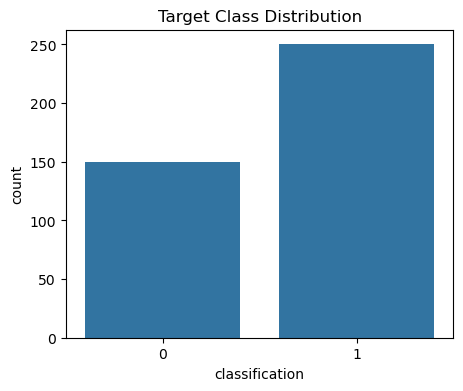

In [70]:
# Check the target column name (adjust if different)
print("Columns:", df.columns.tolist())


target_col = 'classification' 

# Display class distribution
print("\nTarget variable distribution:")
print(df[target_col].value_counts())

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("Target Class Distribution")
plt.show()


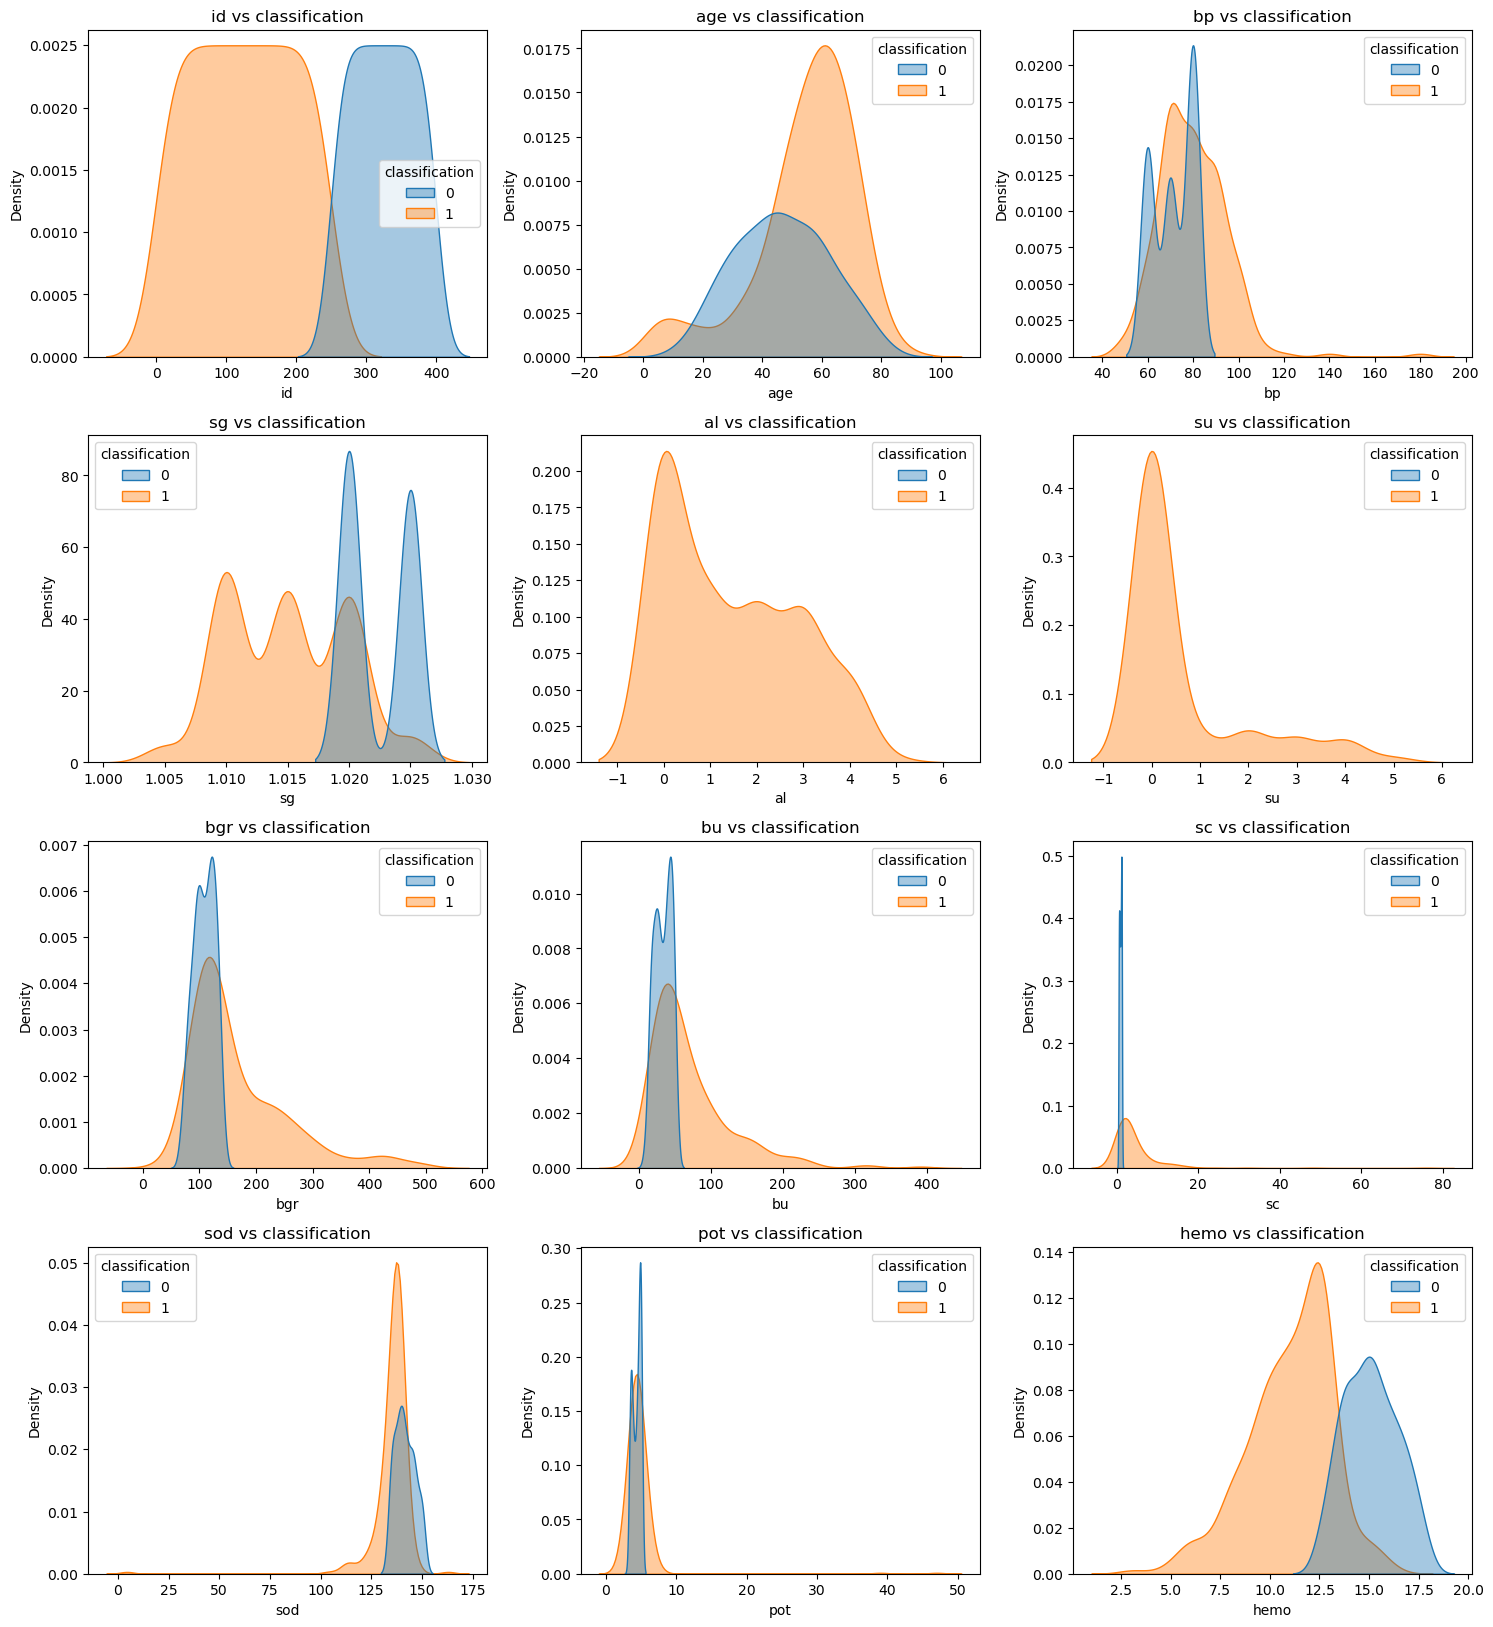

In [71]:
#KDE plot for numerical column

import matplotlib.pyplot as plt
import seaborn as sns

n_num = len(num_cols)
rows_num = (n_num // 3) + 1
cat_cols = [col for col in df.columns if col not in num_cols + [target_col]]

plt.figure(figsize=(15, 4 * rows_num))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows_num, 3, i)
    sns.kdeplot(data=df, x=col, hue=target_col, fill=True, alpha=0.4, warn_singular=False)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()



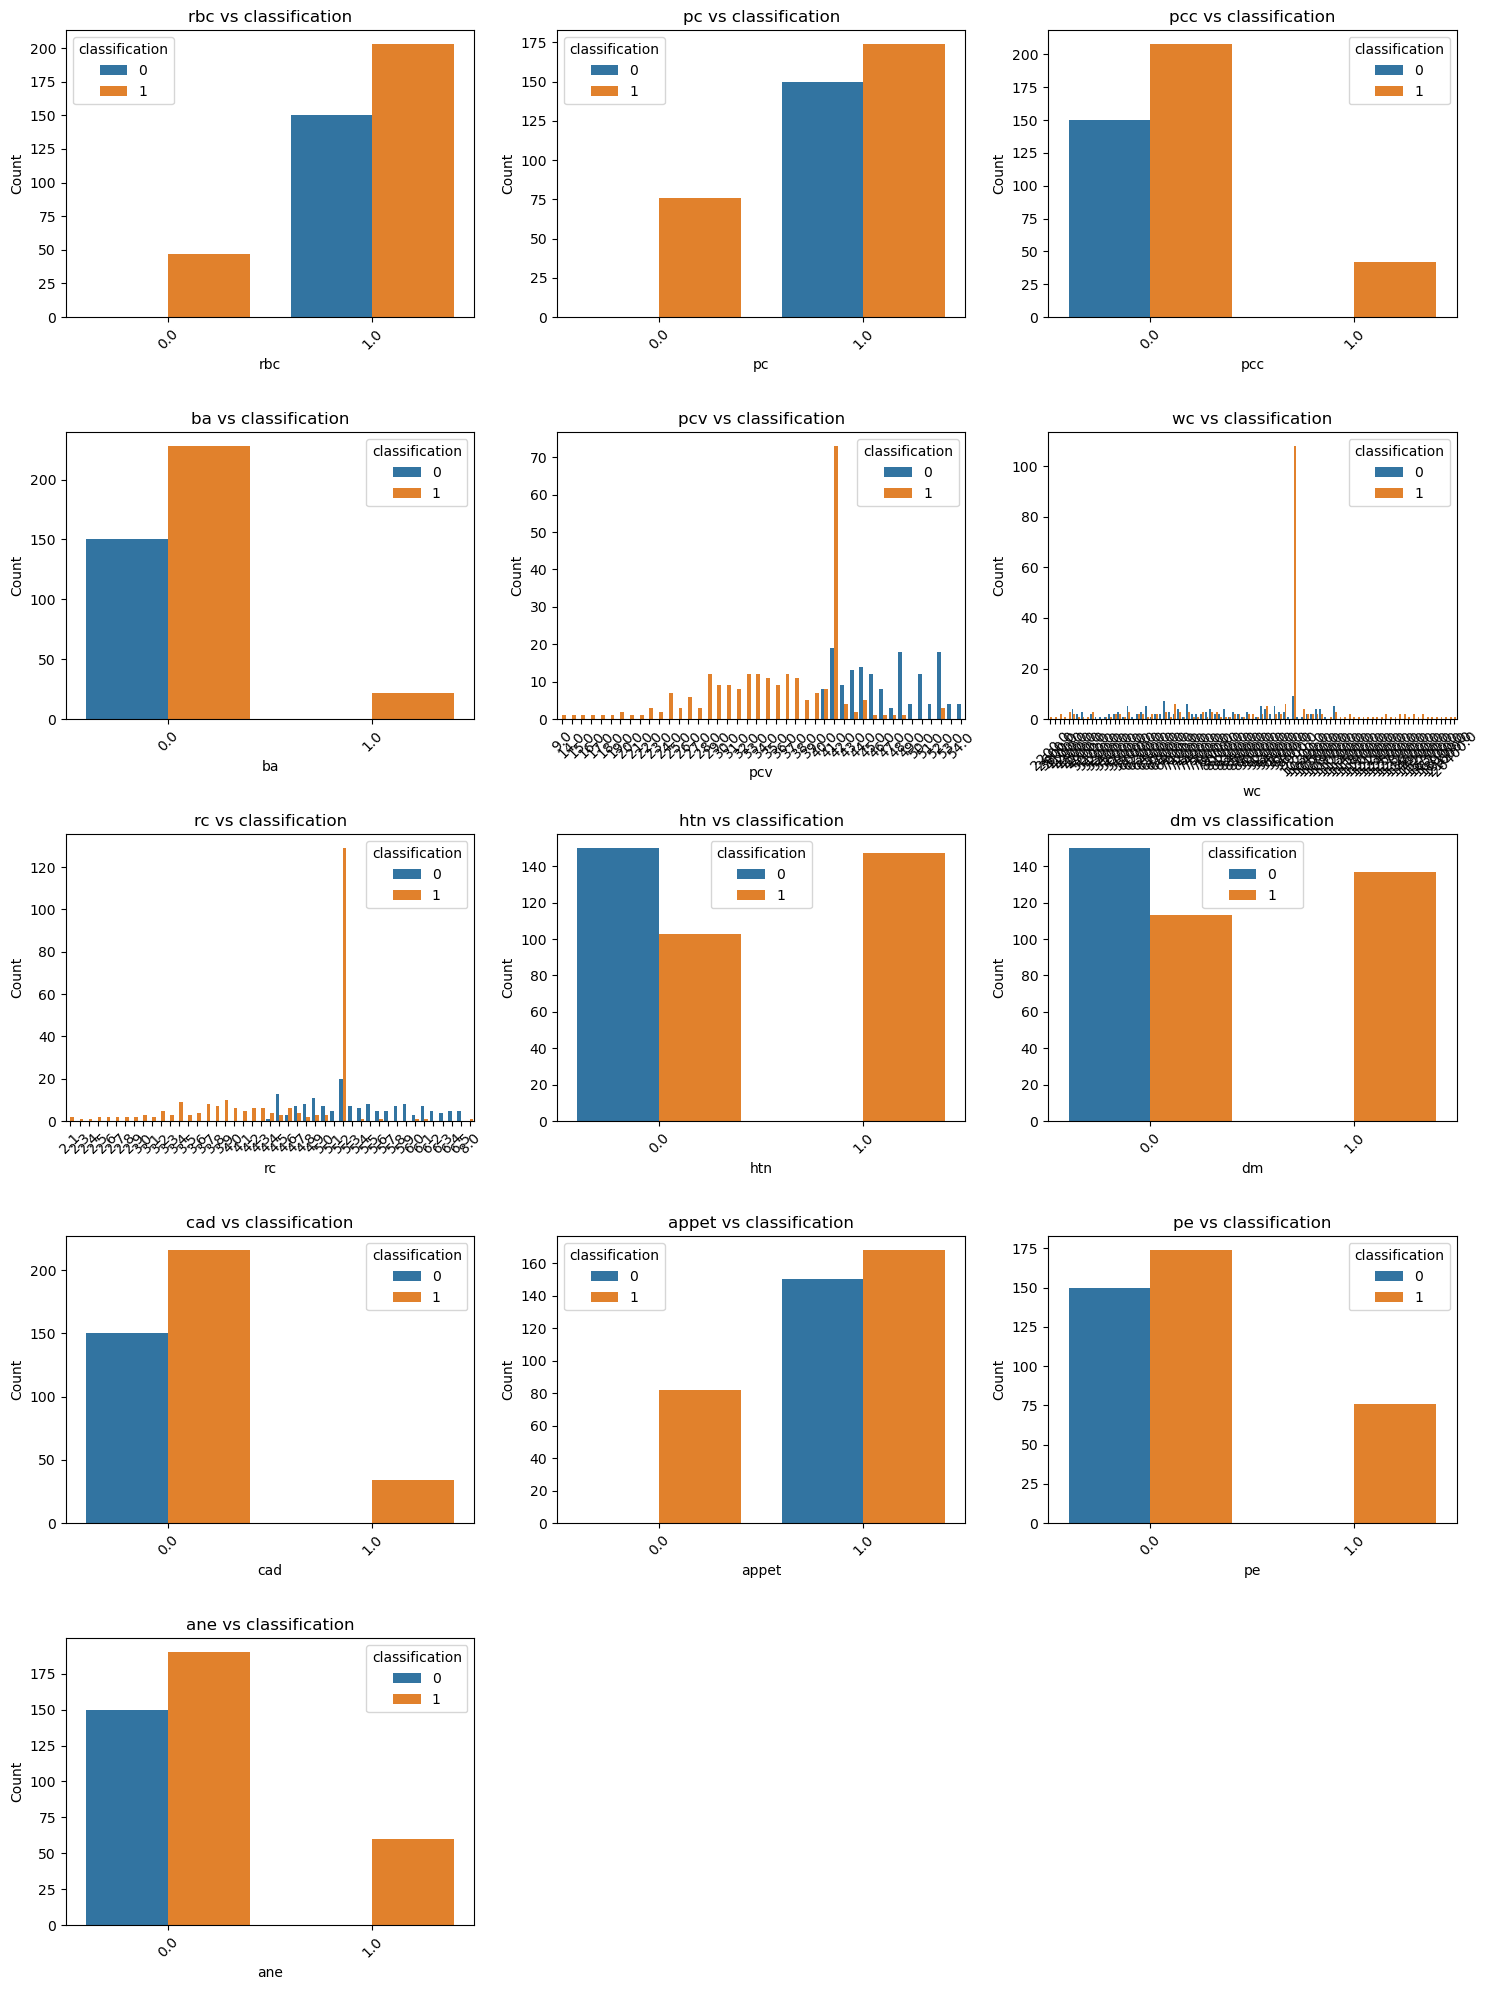

In [72]:
# Plot categorical distributions

n_cat = len(cat_cols)
rows_cat = (n_cat // 3) + 1

plt.figure(figsize=(15, 4 * rows_cat))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows_cat, 3, i)
    sns.countplot(data=df, x=col, hue=target_col)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

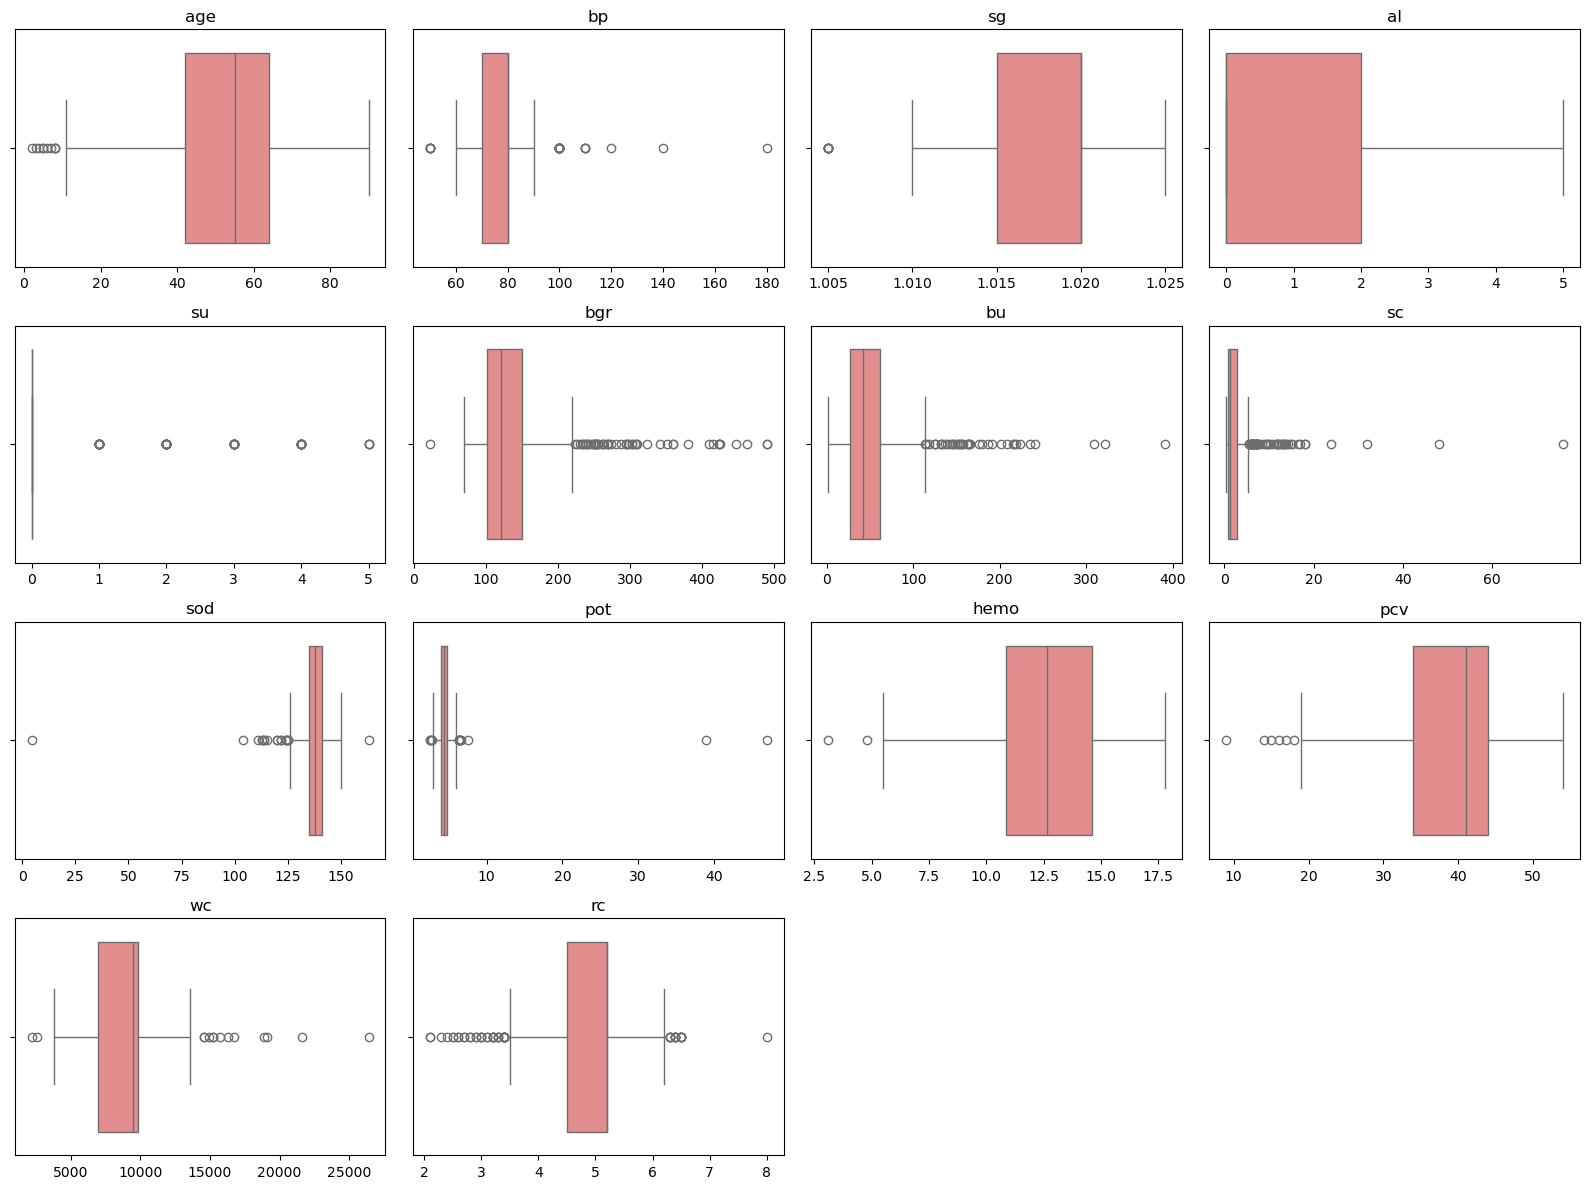

✅ Boxplots shown for 14 continuous numeric columns.


In [82]:
#Boxplot for Outlier Detection

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove id and target column if present
for col in ['id', 'classification']:
    if col in num_cols:
        num_cols.remove(col)

# Keep only continuous numeric columns (not binary)
num_cols = [col for col in num_cols if df[col].nunique() > 2]

# Dynamic subplot layout
cols_per_row = 4
rows = int(np.ceil(len(num_cols) / cols_per_row))

plt.figure(figsize=(16, rows * 3))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()

print(f"✅ Boxplots shown for {len(num_cols)} continuous numeric columns.")


In [74]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [75]:
corr_matrix = df.corr(numeric_only=True)

In [76]:
target_corr = corr_matrix['classification'].sort_values(ascending=False)
print("🔝 Top correlated features with 'classification':")
print(target_corr.head(10))

🔝 Top correlated features with 'classification':
classification    1.000000
htn               0.590438
dm                0.559060
al                0.531562
bgr               0.379321
pe                0.375154
bu                0.369393
ane               0.325396
su                0.294555
bp                0.293693
Name: classification, dtype: float64


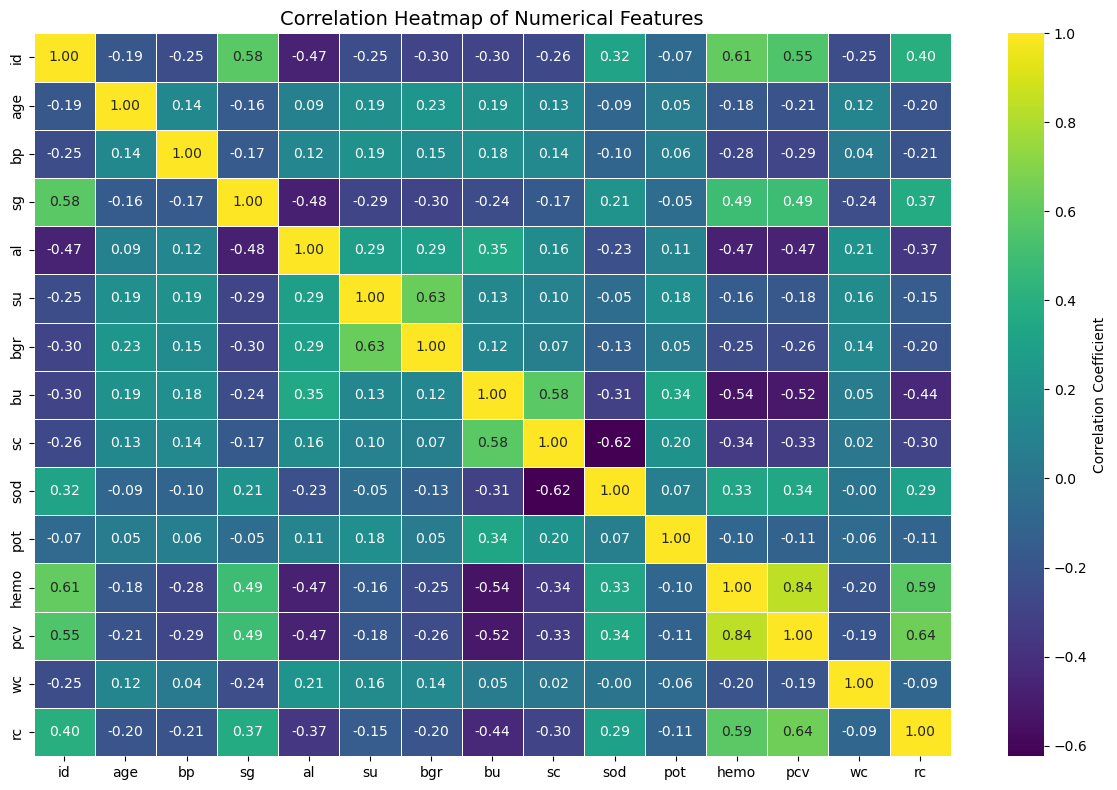

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Keep only columns with more than 2 unique numeric values
num_df = num_df.loc[:, num_df.nunique() > 2]

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap='viridis',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()



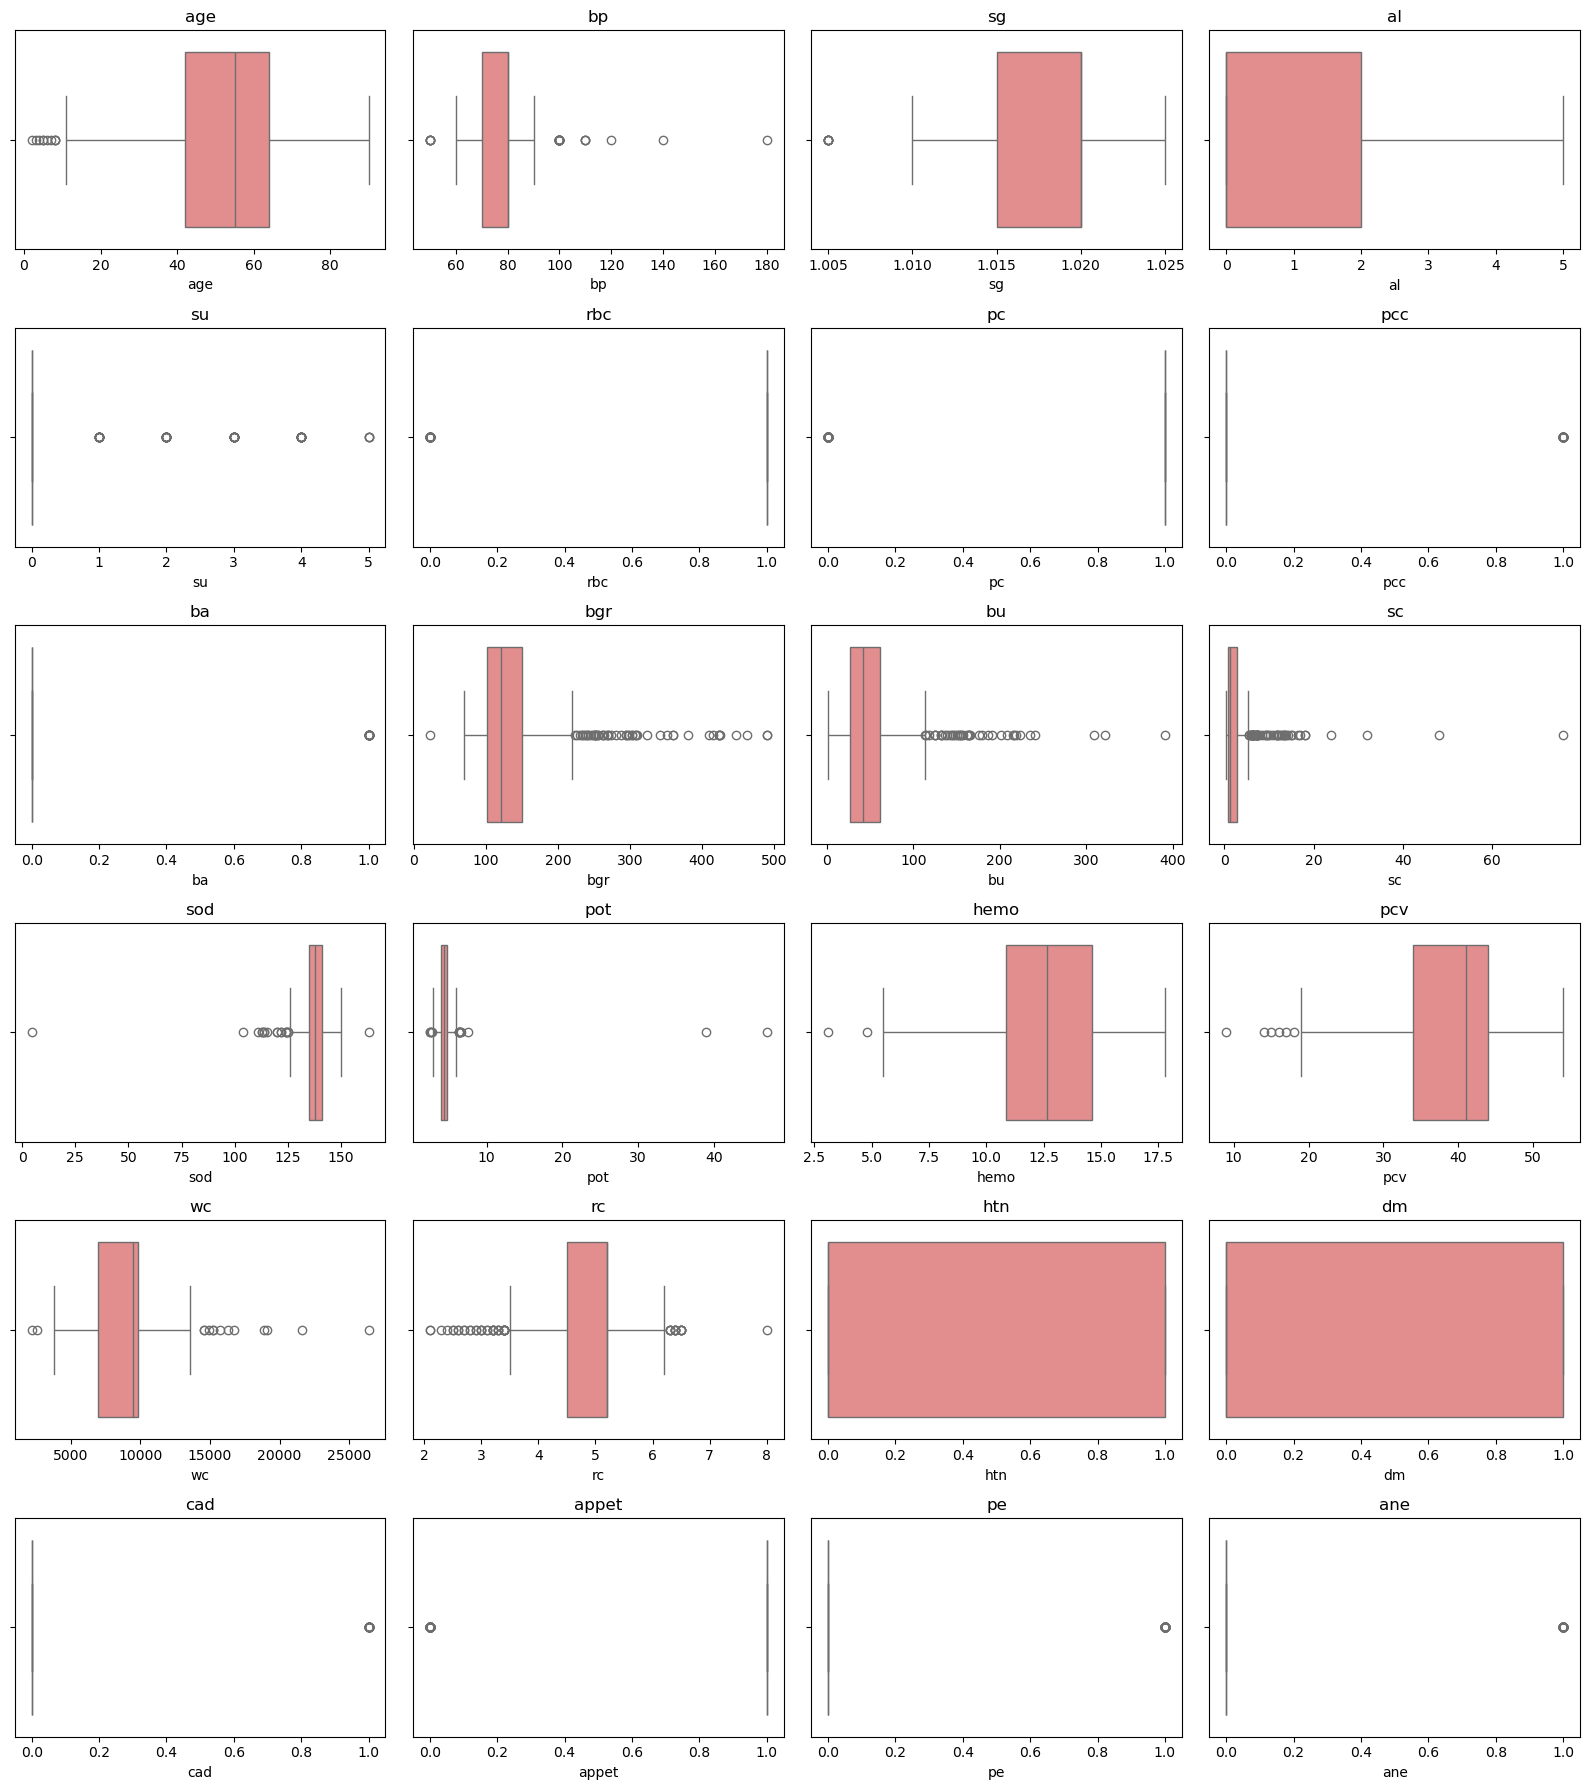

In [81]:
#Boxplot to check for outliers:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID and target column (if present)
for col in ['id', 'classification']:
    if col in num_cols:
        num_cols.remove(col)
        
# Dynamic subplot layout
cols_per_row = 4
total = len(num_cols)
rows = int(np.ceil(total / cols_per_row))

# Plot boxplots
plt.figure(figsize=(16, rows * 3))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(col)

plt.tight_layout()
plt.show()

In [49]:
# Capping to remove outliers:

import pandas as pd
import numpy as np

# Identify numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply capping for each numeric column
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))



In [50]:
# List of columns to cap 
selected_cols = ['al', 'bgr', 'bu', 'su', 'bp', 'sc', 'age', 'pot', 'sod']

# Make a copy of your original df to avoid altering it
df_capped = df.copy()

# Capping outliers only for selected columns
for col in selected_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df_capped[col] = np.where(df_capped[col] > upper_limit, upper_limit,
                              np.where(df_capped[col] < lower_limit, lower_limit, df_capped[col]))


In [51]:
selected_cols = ['al', 'bgr', 'bu', 'su', 'bp', 'sc', 'age', 'pot', 'sod']
target_col = 'classification'

In [52]:
X = df_capped[selected_cols]
y = df_capped[target_col]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:
#Applying SMOTE method to handle imbalance data

from imblearn.over_sampling import SMOTE  
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {1.0: 200, 0.0: 120}
After SMOTE: {1.0: 200, 0.0: 200}


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [56]:
#Train the Model - RandomForest 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_res)

RandomForestClassifier(random_state=42)

In [57]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test_scaled)[:, 1]



In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("🎯 ROC-AUC Score:",roc_auc_score(y_test, y_prob))

Accuracy: 0.9875

Confusion Matrix:
 [[30  0]
 [ 1 49]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

🎯 ROC-AUC Score: 0.9993333333333334


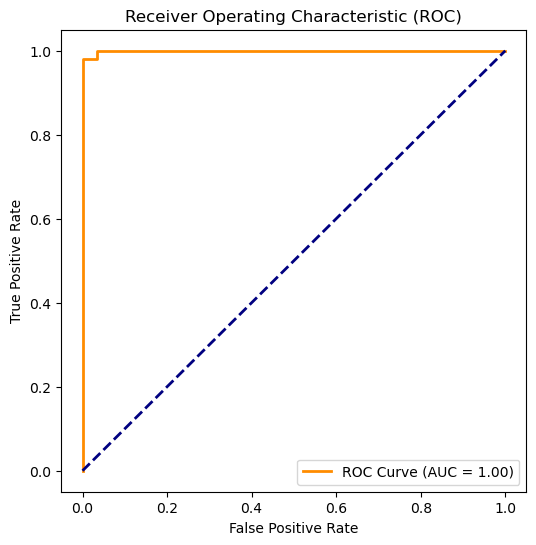

In [59]:
#ROC curve 

y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [60]:
import pickle

with open('kidney_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the fitted scaler
with open('kidney_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)